# CAPSTONE PROJECT - Credit Card Fraud Detection
## Ravi Edla and Vaibhav Sharma

## Problem Statement

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.
-In this project, you will analyse customer-level data which has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.

### Understanding and Defining Fraud
Credit card fraud is any dishonest act and behaviour to obtain information without the proper authorization from the account holder for financial gain. Among different ways of frauds, Skimming is the most common one, which is the way of duplicating of information located on the magnetic strip of the card.  Apart from this, the other ways are:

1. Manipulation/alteration of genuine cards
2. Creation of counterfeit cards
3. Stolen/lost credit cards
4. Fraudulent telemarketing

## Importing All required Libraries

In [2]:
# importing required libraries

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from scipy import interp

## from imblearn import over_sampling

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from collections import Counter # counter takes values returns value_counts dictionary
import time
import datetime

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)


In [3]:
#Check start time

now = datetime.datetime.now()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))


Current date and time : 
2020-11-09 15:41:53


In [4]:
def roc_curve_graph (classifier, X_train, y_train):
    fig1 = plt.figure(figsize=[12,8])
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    
    n = 1
    for train,test in skf.split(X_train,y_train):
        prediction = classifier.fit(X_train,y_train).predict_proba(X_test)
        fpr, tpr, t = roc_curve(y_test, prediction[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (n, roc_auc))
        n= n+1

    linewidth = 2
    plt.plot([0, 1], [0, 1], color='navy', lw=linewidth, linestyle='--')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='red', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Receiver Operating Characteristic')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

## Exploratory Data Analysis

In [5]:
df1 = pd.read_csv('creditcard.csv')
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Basic sanity check
df1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Checking number of rows and columns in our data set
df1.shape

(284807, 31)

In [8]:
#checking for null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [9]:
# checking percentage of null values
round(100*(df1.isnull().sum()/len(df1)), 2)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

#### Checking the null value graphically

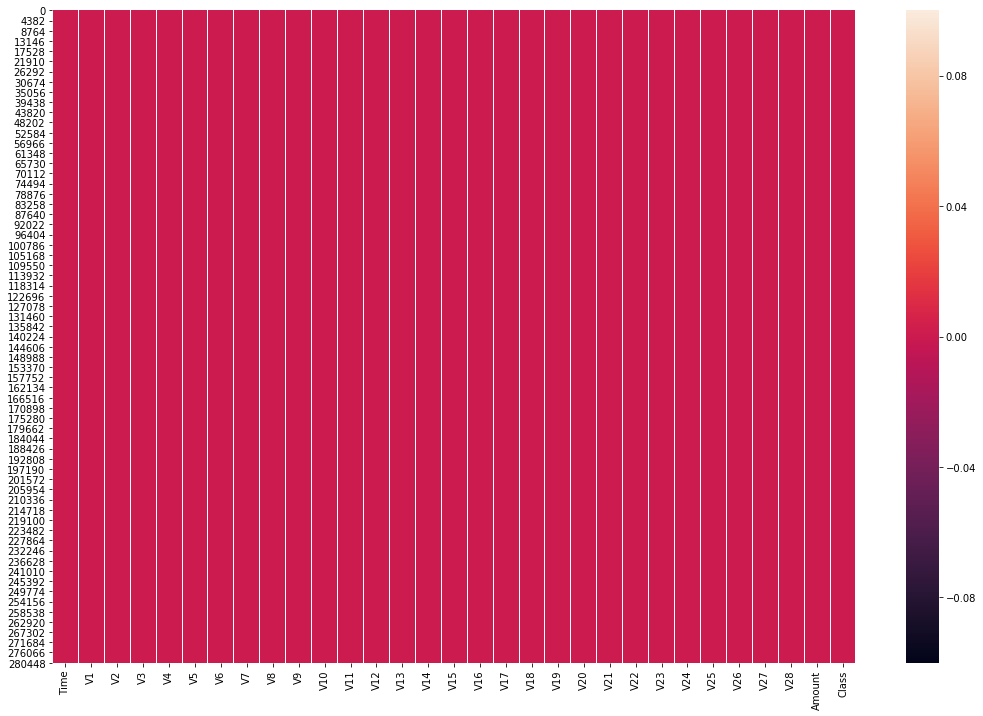

In [10]:

plt.figure(figsize=(18,12))
sns.heatmap(df1.isnull(), cbar=True)

#### Here we will observe the distribution of our classes

In [11]:
classes=df1['Class'].value_counts()
normal_share=classes[0]/df1['Class'].count()*100
fraud_share=classes[1]/df1['Class'].count()*100

In [12]:
print('Normal Share of classes: '+str(round(normal_share,2))+'%')
print('Fraud Share of classes: '+str(round(fraud_share,2))+'%')

Normal Share of classes: 99.83%
Fraud Share of classes: 0.17%


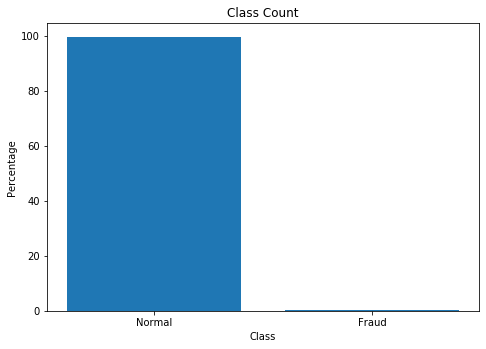

In [13]:
# Plotting a bar plot to check  percentage of fraudulent vs non-fraudulent transcations in complete data set

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classes1 = ['Normal', 'Fraud']
percent = [round(normal_share,2),round(fraud_share,2)]
plt.title("Class Count")
plt.xlabel("Class")
plt.ylabel("Percentage")
ax.bar(classes1,percent)
plt.show()

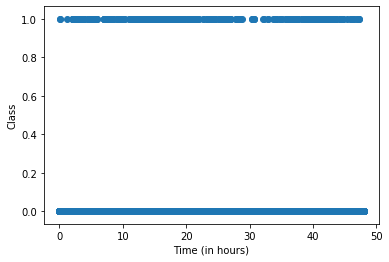

In [14]:
# Plotting  scatter plot to observe the distribution of classes with time
plt.scatter(df1['Time']/(60*60), df1['Class'])
plt.xlabel('Time (in hours)')
plt.ylabel('Class')
plt.show()

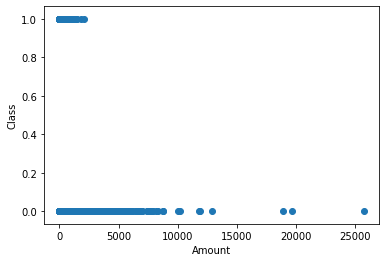

In [15]:
# Plotting a  scatter plot to observe the distribution of classes with Transaction amount
plt.scatter(df1['Amount'], df1['Class'])
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()

In [16]:
# Drop unwanted columns from data set
df1 = df1.drop(['Amount','Time'],axis=1)
df1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


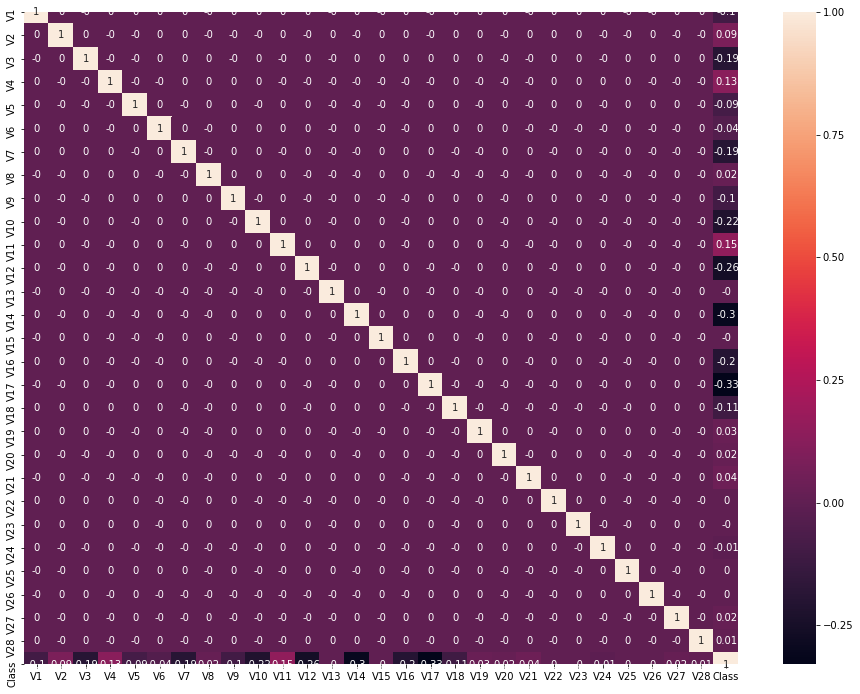

In [17]:
# Checking correlation between various PCA components
corr_df1 = df1.corr()
plt.figure(figsize=(16,12))
sns.heatmap(round(corr_df1,2) ,annot = True)

### Splitting the data into train & test data sets

In [18]:
y = df1['Class']#class variable
X = df1.drop('Class', axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [20]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of the variable with respect to intervals

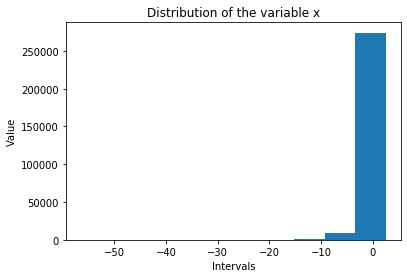

In [21]:
# create the histogram of a variables from the dataset to check the skewness by checking with intervals

plt.hist(df1['V1'])  
plt.xlabel('Intervals')  
plt.ylabel('Value')  
plt.title('Distribution of the variable x')  
plt.show()


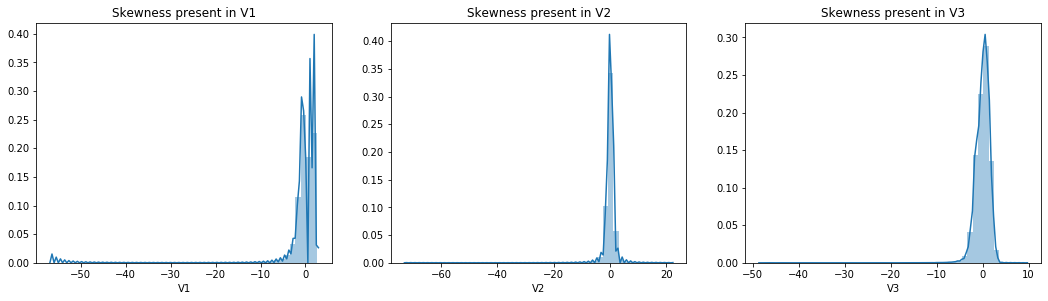

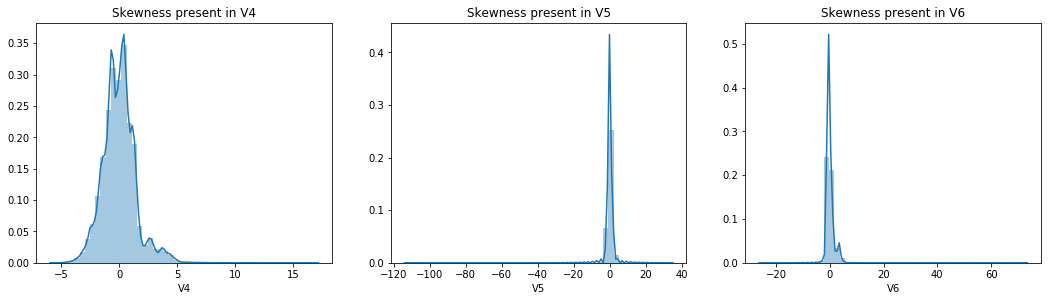

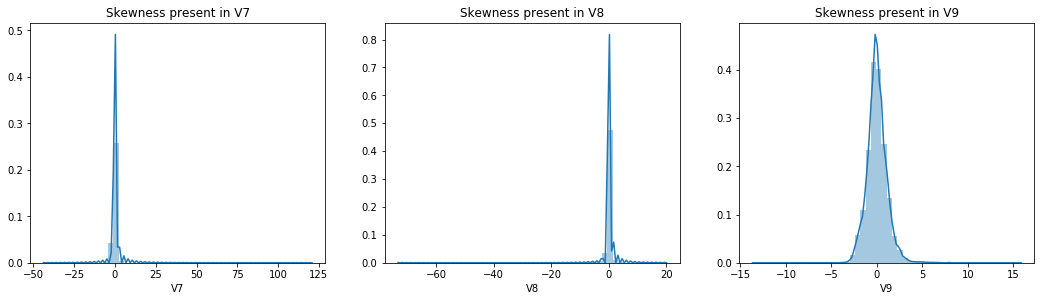

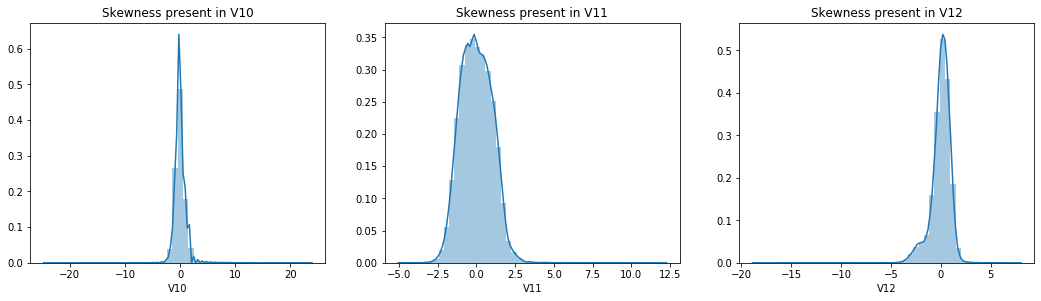

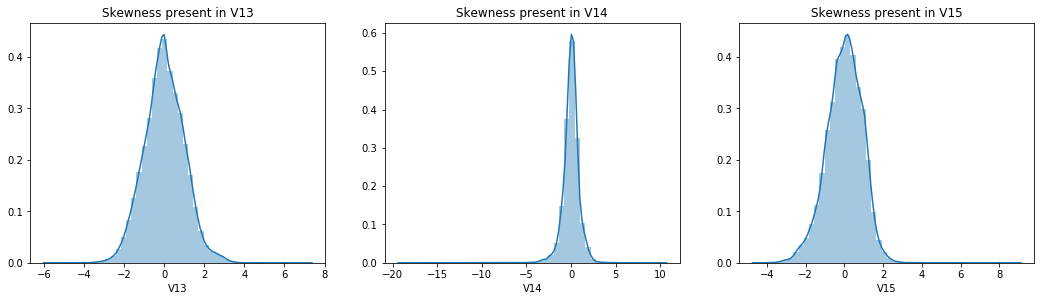

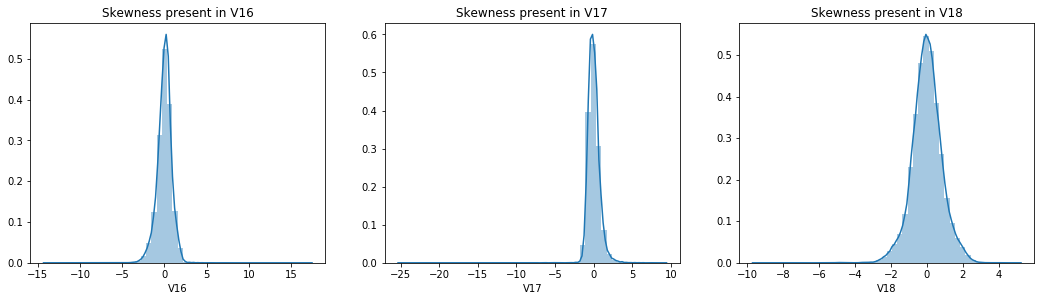

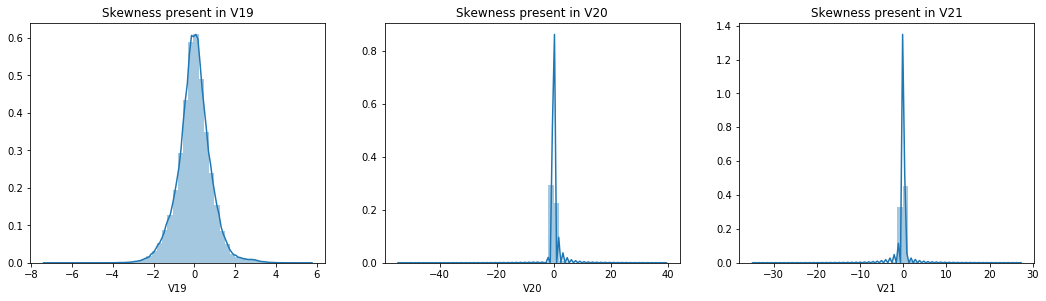

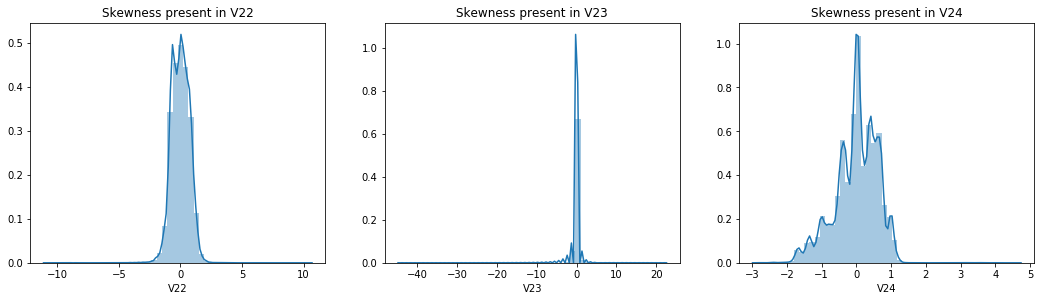

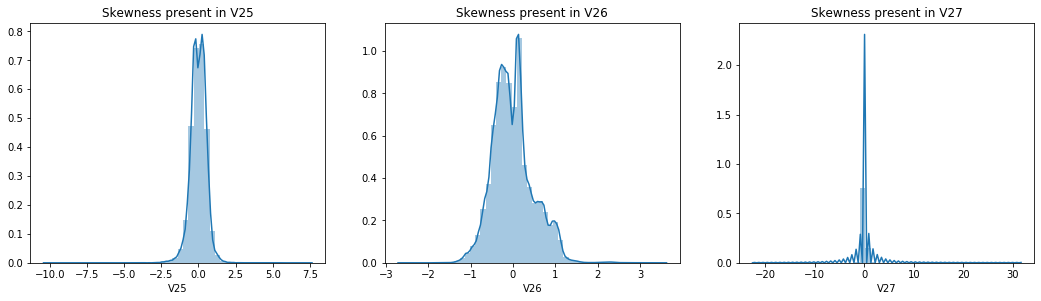

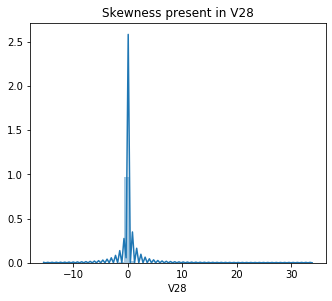

In [22]:
plt.figure(figsize=(18,15))
plt.figure(1)

plt.subplot(3, 3, 1)
plt.title("Skewness present in V1")
ax = sns.distplot(df1.V1)

plt.subplot(3, 3, 2)
plt.title("Skewness present in V2")
ax = sns.distplot(df1.V2)

plt.subplot(3, 3, 3)
plt.title("Skewness present in V3")
ax = sns.distplot(df1.V3)

plt.figure(figsize=(18,15))
plt.figure(2)

plt.subplot(3, 3, 1)
plt.title("Skewness present in V4")
ax = sns.distplot(df1.V4)

plt.subplot(3, 3, 2)
plt.title("Skewness present in V5")
ax = sns.distplot(df1.V5)

plt.subplot(3, 3, 3)
plt.title("Skewness present in V6")
ax = sns.distplot(df1.V6)


plt.figure(figsize=(18,15))
plt.figure(3)

plt.subplot(3, 3, 1)
plt.title("Skewness present in V7")
ax = sns.distplot(df1.V7)

plt.subplot(3, 3, 2)
plt.title("Skewness present in V8")
ax = sns.distplot(df1.V8)

plt.subplot(3, 3, 3)
plt.title("Skewness present in V9")
ax = sns.distplot(df1.V9)

plt.figure(figsize=(18,15))
plt.figure(4)

plt.subplot(3, 3, 1)
plt.title("Skewness present in V10")
ax = sns.distplot(df1.V10)

plt.subplot(3, 3, 2)
plt.title("Skewness present in V11")
ax = sns.distplot(df1.V11)

plt.subplot(3, 3, 3)
plt.title("Skewness present in V12")
ax = sns.distplot(df1.V12)

plt.figure(figsize=(18,15))
plt.figure(5)

plt.subplot(3, 3, 1)
plt.title("Skewness present in V13")
ax = sns.distplot(df1.V13)

plt.subplot(3, 3, 2)
plt.title("Skewness present in V14")
ax = sns.distplot(df1.V14)

plt.subplot(3, 3, 3)
plt.title("Skewness present in V15")
ax = sns.distplot(df1.V15)

plt.figure(figsize=(18,15))
plt.figure(6)

plt.subplot(3, 3, 1)
plt.title("Skewness present in V16")
ax = sns.distplot(df1.V16)

plt.subplot(3, 3, 2)
plt.title("Skewness present in V17")
ax = sns.distplot(df1.V17)

plt.subplot(3, 3, 3)
plt.title("Skewness present in V18")
ax = sns.distplot(df1.V18)

plt.figure(figsize=(18,15))
plt.figure(7)

plt.subplot(3, 3, 1)
plt.title("Skewness present in V19")
ax = sns.distplot(df1.V19)

plt.subplot(3, 3, 2)
plt.title("Skewness present in V20")
ax = sns.distplot(df1.V20)

plt.subplot(3, 3, 3)
plt.title("Skewness present in V21")
ax = sns.distplot(df1.V21)

plt.figure(figsize=(18,15))
plt.figure(8)

plt.subplot(3, 3, 1)
plt.title("Skewness present in V22")
ax = sns.distplot(df1.V22)

plt.subplot(3, 3, 2)
plt.title("Skewness present in V23")
ax = sns.distplot(df1.V23)

plt.subplot(3, 3, 3)
plt.title("Skewness present in V24")
ax = sns.distplot(df1.V24)

plt.figure(figsize=(18,15))
plt.figure(9)

plt.subplot(3, 3, 1)
plt.title("Skewness present in V25")
ax = sns.distplot(df1.V25)

plt.subplot(3, 3, 2)
plt.title("Skewness present in V26")
ax = sns.distplot(df1.V26)

plt.subplot(3, 3, 3)
plt.title("Skewness present in V27")
ax = sns.distplot(df1.V27)

plt.figure(figsize=(18,15))
plt.figure(10)

plt.subplot(3, 3, 1)
plt.title("Skewness present in V28")
ax = sns.distplot(df1.V28)


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [23]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

pt = PowerTransformer(copy=False)
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt1 = pt.transform(X_train)    ## Then apply on all data
X_test_pt1 = pt.transform(X_test)

In [24]:
df_xtrain = pd.DataFrame(data=X_train_pt1, columns=list(X_train.columns))
df_xtrain.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-0.267697,0.404782,-0.037582,-0.495586,0.417461,-0.450219,0.677525,-0.079224,-0.119844,-0.170534,0.412057,0.288581,-0.647993,0.396618,-1.095884,0.195317,-0.893124,-0.101442,0.413064,-0.052398,-0.305036,-0.796136,0.056456,-0.669016,-0.954144,0.386449,0.578464,0.267038
1,1.167168,-0.201782,-1.385696,0.868101,0.434724,-0.791180,0.737052,-0.437967,-0.246955,0.508288,0.517382,0.111280,-1.062881,1.437649,-0.519666,-0.232928,-0.873097,0.375357,-0.009792,-0.042231,0.398622,0.722406,-0.385755,-0.641055,0.951240,-0.898773,-0.195537,-0.166521
2,-0.792373,-2.385479,-0.987745,0.403150,-1.478402,-0.554012,1.280349,-0.714879,-1.218243,0.119978,-0.330591,0.041586,1.051604,0.399975,0.878297,-1.438177,0.032724,1.099329,-1.345961,2.863557,0.486079,-1.922162,-1.734577,0.838645,-0.304635,1.660302,-0.783775,0.704921
3,-0.538573,0.640442,-0.551757,-0.515036,1.826026,2.172282,0.039457,0.777160,-0.250948,0.158587,0.057814,-0.528515,0.015137,-0.378622,1.604442,0.412138,-0.394405,0.467206,1.137542,0.289018,-0.251382,-0.976642,0.224379,1.768707,-1.469473,0.177960,0.016490,0.784726
4,-0.596658,0.056559,0.052907,-1.351635,1.933233,2.527105,-0.156943,0.944995,0.474378,-0.229042,-0.284113,-0.370878,-0.246094,-0.480443,0.411183,-0.019441,-0.861415,-0.011546,-0.556713,0.196280,0.245843,1.050549,-0.527474,1.382820,-0.198843,1.242931,0.173308,-0.093808


In [25]:
df_xtest = pd.DataFrame(data=X_test_pt1, columns=list(X_test.columns))
df_xtest.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.321915,1.321042,-0.683540,-0.775206,-1.498690,0.387492,-2.203971,-2.725674,-0.406130,0.144201,-1.659656,0.633858,0.418093,0.932408,0.518718,-1.083688,0.657912,1.894902,-0.970452,-2.493833,5.396941,-2.858799,1.692894,-0.487886,-1.991755,-1.019731,-0.444834,-0.247288
1,-0.401955,0.700339,-0.005694,0.367943,0.871325,-0.181451,1.095979,-0.205780,-0.877709,-0.207385,0.285399,0.331714,-0.469909,0.686929,-1.351486,-0.755308,-0.507532,0.193569,0.745809,-0.167962,0.198491,0.678903,-0.640078,-0.716985,0.421758,-1.058867,0.347549,0.429015
2,0.121799,-1.479285,-0.835889,1.160891,-0.817213,0.409930,0.154966,0.083995,0.786520,0.131731,0.545475,-0.441815,-2.328603,0.981633,0.515954,1.044532,-0.987889,1.002235,-0.677871,1.348965,0.448043,-1.045907,-0.304448,1.021275,-1.422576,-2.612971,-0.248881,0.282121
3,0.747125,0.066540,-0.362838,0.343942,0.159319,-0.123465,0.026120,-0.154916,0.257134,-0.213291,-1.457918,-0.742487,-0.179516,-0.327224,1.457945,1.104895,-0.597087,0.270155,0.412840,-0.068633,-0.513758,-1.554657,-0.089345,-1.633633,0.710376,0.464031,-0.088535,0.063453
4,0.567744,-0.189898,0.959105,0.766776,-0.649679,0.265680,-0.660145,0.085821,1.955976,-0.578734,0.371015,-1.938696,1.071190,1.350775,-0.295464,-0.225000,1.067873,-0.416837,-0.734530,-0.256428,-0.284174,-0.289135,0.105440,-0.021353,0.226299,0.705265,-0.007399,0.063981


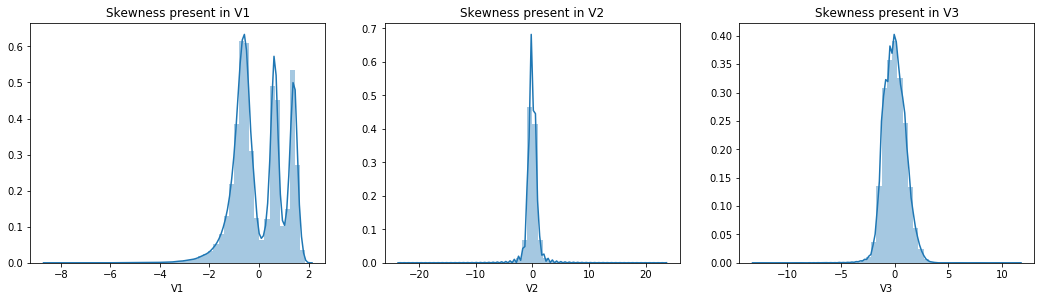

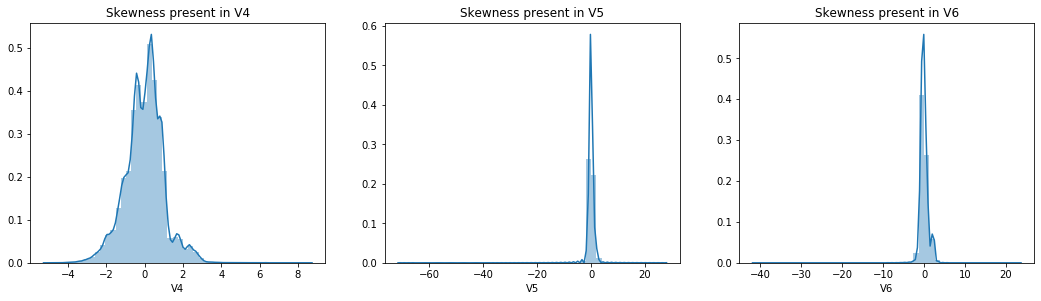

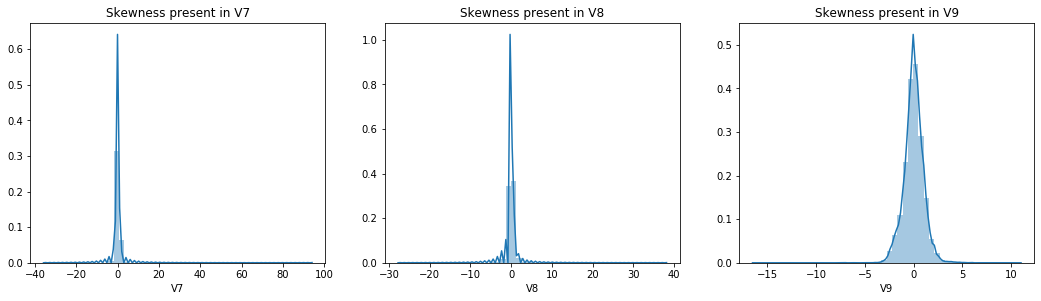

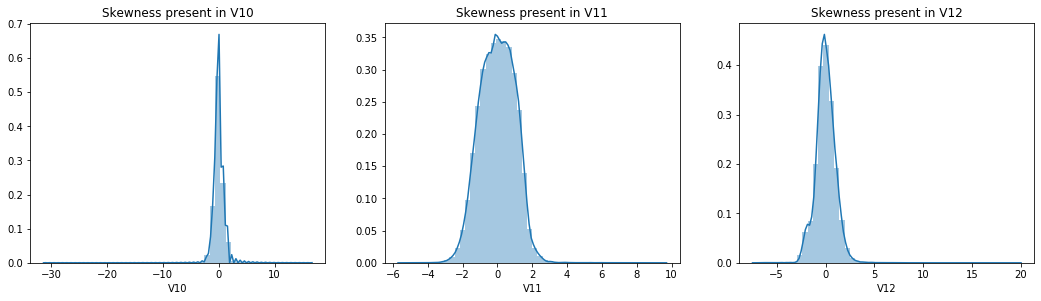

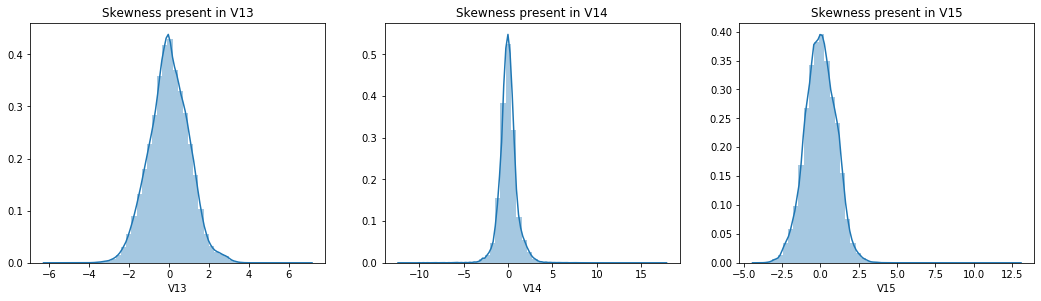

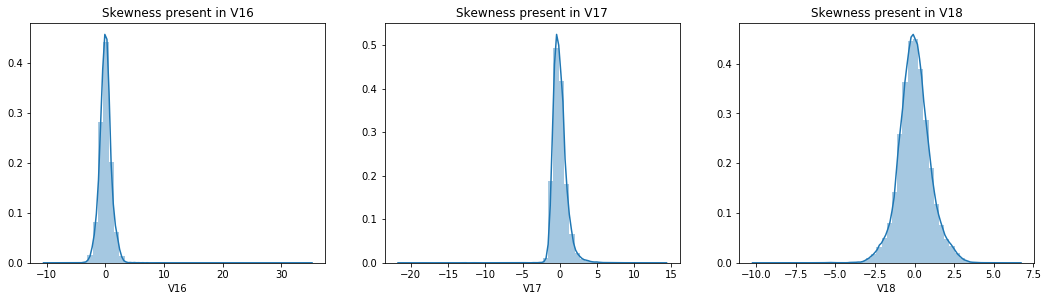

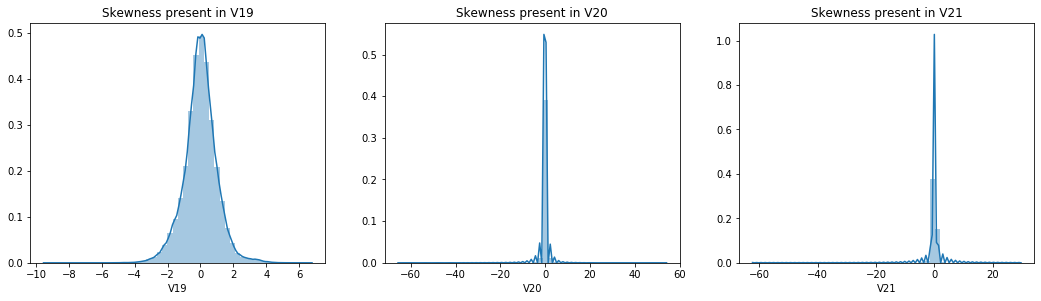

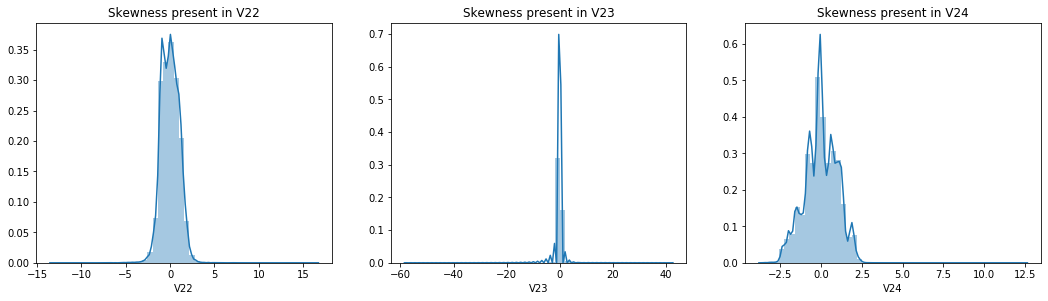

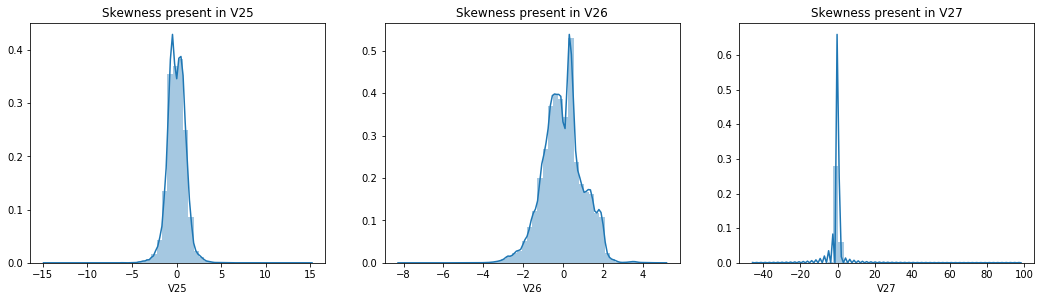

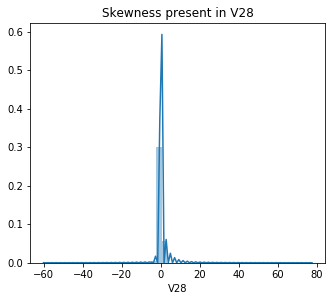

In [26]:
#create the histogram of a Principal componnets to see skweness after transformation

plt.figure(figsize=(18,15))
plt.figure(1)

plt.subplot(3, 3, 1)
plt.title("Skewness present in V1")
ax = sns.distplot(df_xtrain.V1)

plt.subplot(3, 3, 2)
plt.title("Skewness present in V2")
ax = sns.distplot(df_xtrain.V2)

plt.subplot(3, 3, 3)
plt.title("Skewness present in V3")
ax = sns.distplot(df_xtrain.V3)

plt.figure(figsize=(18,15))
plt.figure(2)

plt.subplot(3, 3, 1)
plt.title("Skewness present in V4")
ax = sns.distplot(df_xtrain.V4)

plt.subplot(3, 3, 2)
plt.title("Skewness present in V5")
ax = sns.distplot(df_xtrain.V5)

plt.subplot(3, 3, 3)
plt.title("Skewness present in V6")
ax = sns.distplot(df_xtrain.V6)


plt.figure(figsize=(18,15))
plt.figure(3)

plt.subplot(3, 3, 1)
plt.title("Skewness present in V7")
ax = sns.distplot(df_xtrain.V7)

plt.subplot(3, 3, 2)
plt.title("Skewness present in V8")
ax = sns.distplot(df_xtrain.V8)

plt.subplot(3, 3, 3)
plt.title("Skewness present in V9")
ax = sns.distplot(df_xtrain.V9)

plt.figure(figsize=(18,15))
plt.figure(4)

plt.subplot(3, 3, 1)
plt.title("Skewness present in V10")
ax = sns.distplot(df_xtrain.V10)

plt.subplot(3, 3, 2)
plt.title("Skewness present in V11")
ax = sns.distplot(df_xtrain.V11)

plt.subplot(3, 3, 3)
plt.title("Skewness present in V12")
ax = sns.distplot(df_xtrain.V12)

plt.figure(figsize=(18,15))
plt.figure(5)

plt.subplot(3, 3, 1)
plt.title("Skewness present in V13")
ax = sns.distplot(df_xtrain.V13)

plt.subplot(3, 3, 2)
plt.title("Skewness present in V14")
ax = sns.distplot(df_xtrain.V14)

plt.subplot(3, 3, 3)
plt.title("Skewness present in V15")
ax = sns.distplot(df_xtrain.V15)

plt.figure(figsize=(18,15))
plt.figure(6)

plt.subplot(3, 3, 1)
plt.title("Skewness present in V16")
ax = sns.distplot(df_xtrain.V16)

plt.subplot(3, 3, 2)
plt.title("Skewness present in V17")
ax = sns.distplot(df_xtrain.V17)

plt.subplot(3, 3, 3)
plt.title("Skewness present in V18")
ax = sns.distplot(df_xtrain.V18)

plt.figure(figsize=(18,15))
plt.figure(7)

plt.subplot(3, 3, 1)
plt.title("Skewness present in V19")
ax = sns.distplot(df_xtrain.V19)

plt.subplot(3, 3, 2)
plt.title("Skewness present in V20")
ax = sns.distplot(df_xtrain.V20)

plt.subplot(3, 3, 3)
plt.title("Skewness present in V21")
ax = sns.distplot(df_xtrain.V21)

plt.figure(figsize=(18,15))
plt.figure(8)

plt.subplot(3, 3, 1)
plt.title("Skewness present in V22")
ax = sns.distplot(df_xtrain.V22)

plt.subplot(3, 3, 2)
plt.title("Skewness present in V23")
ax = sns.distplot(df_xtrain.V23)

plt.subplot(3, 3, 3)
plt.title("Skewness present in V24")
ax = sns.distplot(df_xtrain.V24)

plt.figure(figsize=(18,15))
plt.figure(9)

plt.subplot(3, 3, 1)
plt.title("Skewness present in V25")
ax = sns.distplot(df_xtrain.V25)

plt.subplot(3, 3, 2)
plt.title("Skewness present in V26")
ax = sns.distplot(df_xtrain.V26)

plt.subplot(3, 3, 3)
plt.title("Skewness present in V27")
ax = sns.distplot(df_xtrain.V27)

plt.figure(figsize=(18,15))
plt.figure(10)

plt.subplot(3, 3, 1)
plt.title("Skewness present in V28")
ax = sns.distplot(df_xtrain.V28)


## Model Building on Imbalanced Data
- We build different models on imbalanced data set and see the results that comes out of it.

## Logistic Regression

In [27]:
# Logistic Regression

logreg1=LogisticRegression(random_state=100)
logreg1.fit(df_xtrain,y_train)

LogisticRegression(random_state=100)

In [28]:
# seeing Accuracy , Presion , Recall , F1-Score , AUC on test data
y_pred=logreg1.predict(df_xtest)
print('Accuracy  is : {0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC       is : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision is : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall    is : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1        is : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy  is : 0.99918
AUC       is : 0.81747
Precision is : 0.85455
Recall    is : 0.63514
F1        is : 0.72868


In [29]:
folds = 5
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=100)

In [30]:
# defining hyperparameter 
params = {'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
scoring = ['accuracy','precision','recall','roc_auc','f1']

# instantiate the model
logreg = LogisticRegression(random_state=100, solver='lbfgs', max_iter=1000)

# Grid Search Cross Validation
grid_search = GridSearchCV(estimator=logreg, param_grid=params, scoring=scoring, cv=skf,refit='roc_auc', verbose=1, return_train_score=False)

In [31]:
grid_search.fit(df_xtrain, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   26.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=LogisticRegression(max_iter=1000, random_state=100),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'roc_auc', 'f1'],
             verbose=1)

In [32]:
grid_search_result = pd.DataFrame(grid_search.cv_results_)
print("Accuracy  is : %.2f%%" % (grid_search_result.mean_test_accuracy.max()*100.0))
print("Precision is : %.2f%%" % (grid_search_result.mean_test_precision.max()*100.0))
print("Recall    is  : %.2f%%" % (grid_search_result.mean_test_recall.max()*100.0))
print("ROC-AUC   is : %.2f%%" % (grid_search_result.mean_test_roc_auc.max()*100.0))
print("f1_score  is : %.2f%%" % (grid_search_result.mean_test_f1.max()*100.0))

Accuracy  is : 99.93%
Precision is : 90.62%
Recall    is  : 66.29%
ROC-AUC   is : 98.32%
f1_score  is : 76.11%


In [33]:
# calculating best parameter to be used in model
grid_search.best_params_

{'C': 0.01}

In [34]:
# Calulate Accuracy , Presion , Recall , ROC_AUC , F1-SCORE, Using optimum value of hyperparameter
logisticmodel1 = LogisticRegression(C=0.01,random_state=100, solver='lbfgs', max_iter=1000)
scoring = ['accuracy','precision','recall','roc_auc','f1']
scores = cross_validate(logisticmodel1,  df_xtrain, y_train,scoring=scoring, cv=skf, verbose=1, return_train_score=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.9s finished


In [35]:
# Displaying Accuracy , Presion , Recall , ROC_AUC , F1-SCORE
cv_results = pd.DataFrame(scores)
print("Accuracy  is : %.2f%%" % (cv_results.test_accuracy.max()*100.0))
print("Precision is : %.2f%%" % (cv_results.test_precision.max()*100.0))
print("Recall    is : %.2f%%" % (cv_results.test_recall.max()*100.0))
print("ROC-AUC   is : %.2f%%" % (cv_results.test_roc_auc.max()*100.0))
print("f1_score  is : %.2f%%" % (cv_results.test_f1.max()*100.0))

Accuracy  is : 99.94%
Precision is : 95.83%
Recall    is : 67.65%
ROC-AUC   is : 99.45%
f1_score  is : 79.31%


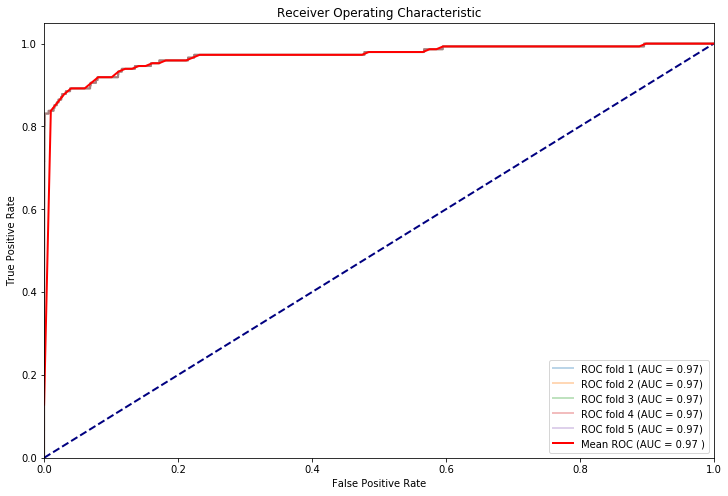

In [36]:
# Building ROC curve to find Cut-off point
roc_curve_graph(logisticmodel1, df_xtrain, y_train)

### The Logistics Regression model on imbalanced data has generated the ROC-AUC of 99.45% with Precision as 95.83%, Recall as 67.65% and F1-Score as 79.31% and accuracy of 99.94%.

## Random Forest

In [37]:
# define hyper-parameters
params = {'max_depth': [5,10], 'min_samples_leaf': range(5,30,5), 'min_samples_split': range(5,30,5), 'max_features': range(4,24,4)}
scoring = ['accuracy', 'precision', 'recall', 'roc_auc','f1']

# instantiate the model
rf1 = RandomForestClassifier(warm_start=True, random_state=100)

# Randomized Grid Search
random_search = RandomizedSearchCV(estimator=rf1, param_distributions=params, scoring=scoring, cv=skf, refit='roc_auc', verbose=1, n_iter=10, return_train_score=False)


In [38]:
random_search.fit(df_xtrain,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 151.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=RandomForestClassifier(random_state=100,
                                                    warm_start=True),
                   param_distributions={'max_depth': [5, 10],
                                        'max_features': range(4, 24, 4),
                                        'min_samples_leaf': range(5, 30, 5),
                                        'min_samples_split': range(5, 30, 5)},
                   refit='roc_auc',
                   scoring=['accuracy', 'precision', 'recall', 'roc_auc', 'f1'],
                   verbose=1)

In [39]:
random_search_result = pd.DataFrame(random_search.cv_results_)
print("Accuracy  is : %.2f%%" % (random_search_result.mean_test_accuracy.max()*100.0))
print("Precision is : %.2f%%" % (random_search_result.mean_test_precision.max()*100.0))
print("Recall    is : %.2f%%" % (random_search_result.mean_test_recall.max()*100.0))
print("ROC-AUC   is : %.2f%%" % (random_search_result.mean_test_roc_auc.max()*100.0))
print("f1_score  is : %.2f%%" % (random_search_result.mean_test_f1.max()*100.0))

Accuracy  is : 99.95%
Precision is : 89.43%
Recall    is : 79.94%
ROC-AUC   is : 98.14%
f1_score  is : 84.23%


In [40]:
# checking best parameter for building Random Forest
random_search.best_params_

{'min_samples_split': 20,
 'min_samples_leaf': 25,
 'max_features': 16,
 'max_depth': 10}

In [41]:
# Using the best parameters for building model
RandomForest = RandomForestClassifier(bootstrap=True, warm_start=True, max_depth=10, max_features=16, min_samples_leaf=15, min_samples_split=25, verbose=1, random_state=100)
scoring = ['accuracy','precision','recall','roc_auc','f1']

# Cross Validation
scores = cross_validate(RandomForest, df_xtrain, y_train, scoring=scoring, cv=skf, verbose=1, return_train_score=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_j

In [42]:
cv_results = pd.DataFrame(scores)
print("Accuracy  is : %.2f%%" % (cv_results.test_accuracy.max()*100.0))
print("Precision is : %.2f%%" % (cv_results.test_precision.max()*100.0))
print("Recall    is : %.2f%%" % (cv_results.test_recall.max()*100.0))
print("ROC-AUC   is : %.2f%%" % (cv_results.test_roc_auc.max()*100.0))
print("f1_score  is : %.2f%%" % (cv_results.test_f1.max()*100.0))

Accuracy  is : 99.95%
Precision is : 91.23%
Recall    is : 82.61%
ROC-AUC   is : 98.69%
f1_score  is : 83.97%


### The Random Forest model on imbalanced dataset has generated the ROC-AUC of 98.69% with Precision as 91.23%, Recall as 82.61% and F1-Score as 83.97%.

## Balancing the data using Random Over Sampling (ROS) and Synthetic Minority Oversampling Technique (SMOTE) 

## Random Oversampling - Logistic Regression

In [43]:
from collections import Counter

##from imblearn import over_sampling

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline, make_pipeline

In [44]:
# define hyper-parameters
params = {'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
new_params = {'logisticregression__' + key: params[key] for key in params}
scoring = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1']

# instantiate the model
logreg_ros1 = LogisticRegression(random_state=100, solver='lbfgs', max_iter=1000)

# define pipeline
pipeline = make_pipeline(RandomOverSampler(sampling_strategy='minority', random_state=100), logreg_ros1)

# Grid Search
grid_search = GridSearchCV(pipeline, param_grid=new_params, scoring=scoring, cv=skf,refit='roc_auc', verbose=1, return_train_score=False)

In [45]:
grid_search.fit(df_xtrain, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   57.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler(random_state=100,
                                                          sampling_strategy='minority')),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=100))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1.0, 10.0,
                                                   100.0, 1000.0]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'roc_auc', 'f1'],
             verbose=1)

In [46]:
grid_search_result = pd.DataFrame(grid_search.cv_results_)
print("Accuracy  is : %.2f%%" % (grid_search_result.mean_test_accuracy.max()*100.0))
print("Precision is : %.2f%%" % (grid_search_result.mean_test_precision.max()*100.0))
print("Recall    is : %.2f%%" % (grid_search_result.mean_test_recall.max()*100.0))
print("ROC-AUC   is : %.2f%%" % (grid_search_result.mean_test_roc_auc.max()*100.0))
print("f1_score  is : %.2f%%" % (grid_search_result.mean_test_f1.max()*100.0))

Accuracy  is : 98.04%
Precision is : 7.52%
Recall    is : 91.29%
ROC-AUC   is : 98.11%
f1_score  is : 13.88%


In [47]:
# obtaining best parameter for our Model
grid_search.best_params_

{'logisticregression__C': 0.001}

In [48]:
# Using the best parameters for building model
LogisticModel1 = LogisticRegression(C=0.001,random_state=100, solver='lbfgs', max_iter=1000)

scoring = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1']

pipeline = make_pipeline(RandomOverSampler(sampling_strategy='minority', random_state=100), LogisticModel1)

# Cross Validation
scores = cross_validate(pipeline, df_xtrain, y_train, scoring=scoring, cv=skf, verbose=1, return_train_score=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.7s finished


In [49]:
# dispalying accuracy,precision,recall,roc_auc,f1 with best paramenter
cv_results = pd.DataFrame(scores)
print("Accuracy  is : %.2f%%" % (cv_results.test_accuracy.max()*100.0))
print("Precision is : %.2f%%" % (cv_results.test_precision.max()*100.0))
print("Recall    is : %.2f%%" % (cv_results.test_recall.max()*100.0))
print("ROC-AUC   is : %.2f%%" % (cv_results.test_roc_auc.max()*100.0))
print("f1_score  is : %.2f%%" % (cv_results.test_f1.max()*100.0))

Accuracy  is : 98.21%
Precision is : 8.08%
Recall    is : 94.12%
ROC-AUC   is : 98.94%
f1_score  is : 14.83%


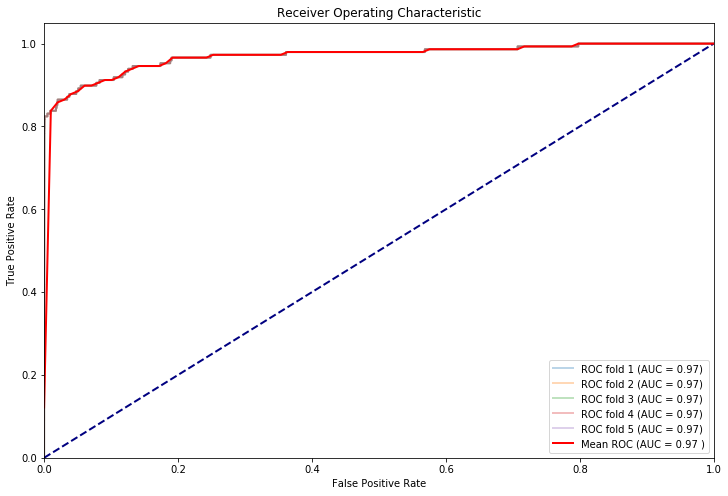

In [50]:
# checking cut-off point
roc_curve_graph(LogisticModel1, df_xtrain, y_train)

### The Logistic Regression model on balanaced data using Oversampling method has generated the ROC-AUC of 98.94% with Precision as 8.08%, Recall as 94.12% and F1-Score as 14.83%.

## Random Oversampling - Random Forest

In [51]:
# define hyper-parameters
params={'max_depth': [5,10],'min_samples_leaf': range(5,30,5), 'min_samples_split': range(5,30,5), 'max_features': range(4,24,4) }
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
scoring = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1']

# instantiate the model
rf_ros1 = RandomForestClassifier(warm_start=True, random_state=100, n_jobs=-1)

# define pipeline
pipeline = make_pipeline(RandomOverSampler(sampling_strategy='minority', random_state=100), rf_ros1)

random_search = RandomizedSearchCV(pipeline, param_distributions=new_params, scoring=scoring, cv=skf,refit = 'roc_auc', verbose=1, n_iter=10, return_train_score=False)

In [52]:
random_search.fit(df_xtrain,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 33.4min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=Pipeline(steps=[('randomoversampler',
                                              RandomOverSampler(random_state=100,
                                                                sampling_strategy='minority')),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(n_jobs=-1,
                                                                     random_state=100,
                                                                     warm_start=True))]),
                   param_distributions={'randomforestclassifier__max_depth': [5,
                                                                              10],
                                        'randomforestclassifier__max_features': range(4, 24, 4),
                                        'randomforestclassifier__min_samples_leaf'

In [53]:
random_search_result = pd.DataFrame(random_search.cv_results_)
print("Accuracy  is : %.2f%%" % (random_search_result.mean_test_accuracy.max()*100.0))
print("Precision is : %.2f%%" % (random_search_result.mean_test_precision.max()*100.0))
print("Recall    is : %.2f%%" % (random_search_result.mean_test_recall.max()*100.0))
print("ROC-AUC   is : %.2f%%" % (random_search_result.mean_test_roc_auc.max()*100.0))
print("f1_score  is : %.2f%%" % (random_search_result.mean_test_f1.max()*100.0))

Accuracy  is : 99.93%
Precision is : 77.65%
Recall    is : 88.38%
ROC-AUC   is : 98.35%
f1_score  is : 80.55%


In [54]:
#checking best parameter for Random forest
random_search.best_params_

{'randomforestclassifier__min_samples_split': 10,
 'randomforestclassifier__min_samples_leaf': 25,
 'randomforestclassifier__max_features': 12,
 'randomforestclassifier__max_depth': 5}

In [55]:
# Using the best parameters for building model
RandomForest = RandomForestClassifier(bootstrap=True,warm_start=True, max_depth=10,max_features=8, min_samples_leaf=20, min_samples_split=5, verbose=1,random_state=100)
scoring = ['accuracy','precision','recall','roc_auc','f1']
pipeline = make_pipeline(RandomOverSampler(sampling_strategy='minority', random_state=100), RandomForest)

# Cross Validation
scores = cross_validate(pipeline, df_xtrain, y_train, scoring=scoring, cv=skf, verbose=1, return_train_score=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_j

In [56]:
# Displaying accuracy,precision,recall,roc_auc,f1 with best parameter
cv_results = pd.DataFrame(scores)
print("Accuracy  is : %.2f%%" % (cv_results.test_accuracy.max()*100.0))
print("Precision is : %.2f%%" % (cv_results.test_precision.max()*100.0))
print("Recall    is : %.2f%%" % (cv_results.test_recall.max()*100.0))
print("ROC-AUC   is : %.2f%%" % (cv_results.test_roc_auc.max()*100.0))
print("f1_score  is : %.2f%%" % (cv_results.test_f1.max()*100.0))

Accuracy  is : 99.94%
Precision is : 81.94%
Recall    is : 86.76%
ROC-AUC   is : 99.58%
f1_score  is : 83.69%


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


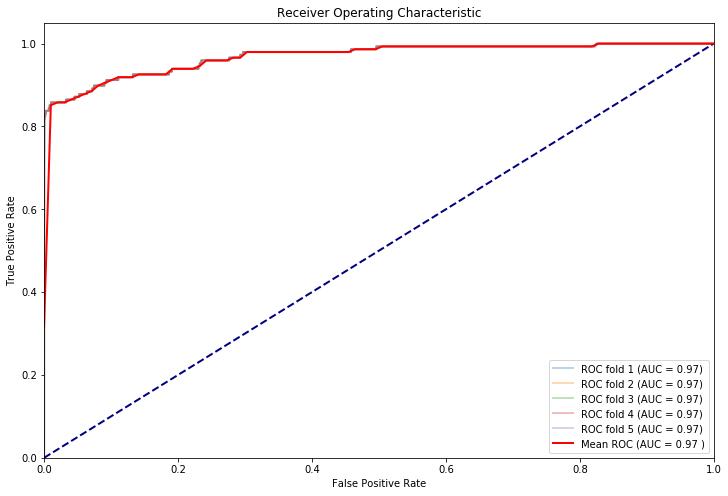

In [57]:
# Building ROC curve to find cutoff-point
roc_curve_graph(RandomForest, df_xtrain, y_train)

###  The Random Forest model on balanaced data using Oversampling method has generated the ROC-AUC of 99.58% with Precision as 81.94%, Recall as 86.76% and F1-Score as 83.69%.

## Synthetically Minority Oversampling Technique

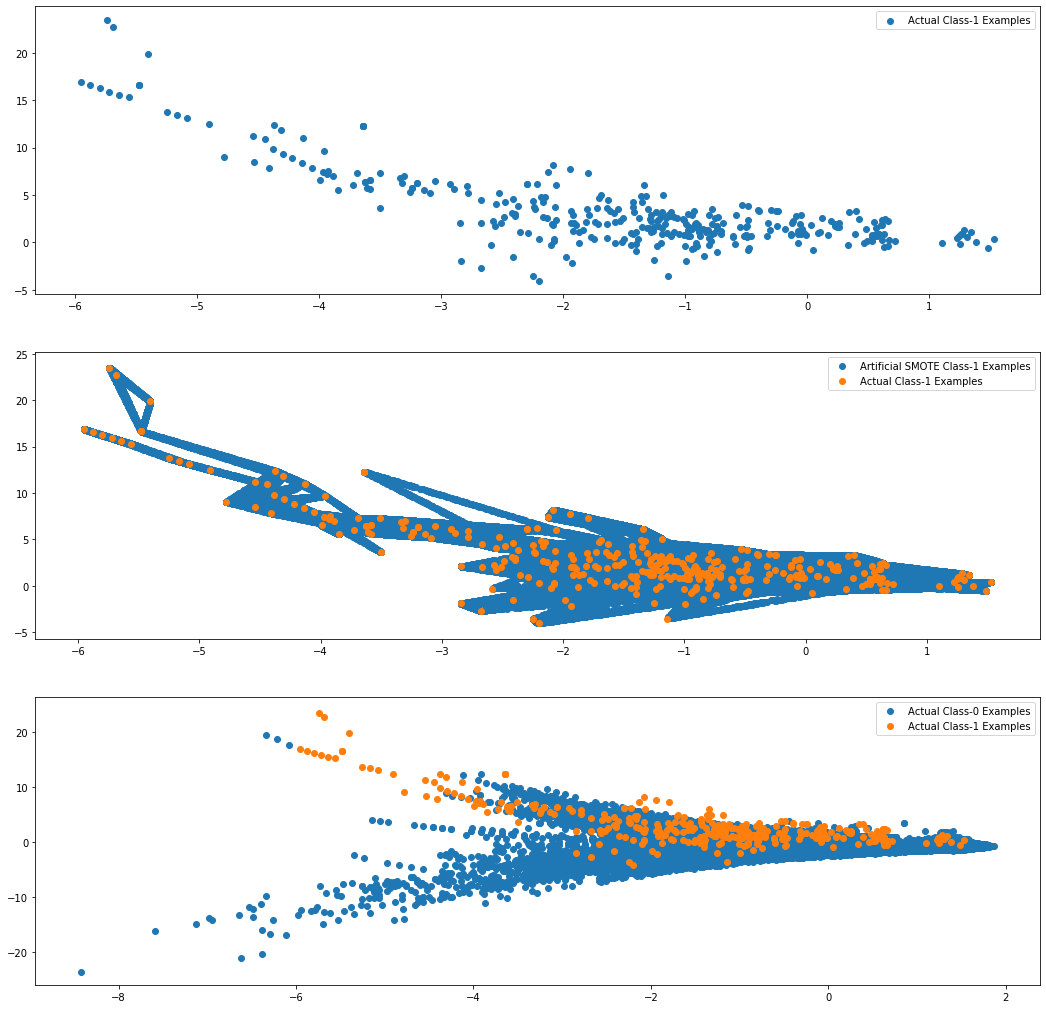

In [58]:
import numpy as np ##adding numpy libraries

sm1 = SMOTE(sampling_strategy='minority', random_state=100)
X_train_smote, y_train_smote = sm1.fit_resample(df_xtrain, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote1 = X_train_smote[df_xtrain.shape[0]:]

X_train_1 = df_xtrain.to_numpy()[np.where(y_train==1.0)]
X_train_0 = df_xtrain.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [18, 18]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label= 'Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)

##plt.scatter(X_train_smote1.iloc[:X_train_smote1.shape[0], 0], X_train_smote1.iloc[:X_train_smote1.shape[0], 1],
  ##          label='Artificial SMOTE Class-1 Examples')

plt.scatter(X_train_smote1[:X_train_smote1.shape[0], 0], X_train_smote1[:X_train_smote1.shape[0], 1], label='Artificial SMOTE Class-1 Examples')

plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label= 'Actual Class-1 Examples')

plt.legend()

plt.subplot(3, 1, 3)

plt.scatter(X_train_0[:X_train_0.shape[0], 0], X_train_0[:X_train_0.shape[0], 1], label= 'Actual Class-0 Examples')
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label= 'Actual Class-1 Examples')
plt.legend()

## SMOTE - Logistic Regression

In [59]:
# define hyper-parameters
params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
new_params = {'logisticregression__' + key: params[key] for key in params}
scoring = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1']

# instantiate the model
logreg_smote = LogisticRegression(random_state=100, solver='lbfgs')

# define pipeline
pipeline = make_pipeline(SMOTE(sampling_strategy='minority', random_state=100), logreg_smote)

# Grid Search
grid_search = GridSearchCV(pipeline,param_grid=new_params, scoring=scoring,cv=skf, refit='roc_auc', verbose=1, return_train_score=False)

In [60]:
grid_search.fit(df_xtrain, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Pipeline(steps=[('smote',
                                        SMOTE(random_state=100,
                                              sampling_strategy='minority')),
                                       ('logisticregression',
                                        LogisticRegression(random_state=100))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'roc_auc', 'f1'],
             verbose=1)

In [61]:
grid_search_result = pd.DataFrame(grid_search.cv_results_)
print("Accuracy  is : %.2f%%" % (grid_search_result.mean_test_accuracy.max()*100.0))
print("Precision is : %.2f%%" % (grid_search_result.mean_test_precision.max()*100.0))
print("Recall    is : %.2f%%" % (grid_search_result.mean_test_recall.max()*100.0))
print("ROC-AUC   is : %.2f%%" % (grid_search_result.mean_test_roc_auc.max()*100.0))
print("f1_score  is : %.2f%%" % (grid_search_result.mean_test_f1.max()*100.0))

Accuracy  is : 97.95%
Precision is : 7.24%
Recall    is : 92.16%
ROC-AUC   is : 98.04%
f1_score  is : 13.41%


In [62]:
# to find best paramenter
grid_search.best_params_

{'logisticregression__C': 0.001}

In [63]:
# Using the best parameters for building model
LogisticModel1 = LogisticRegression(C=0.001,random_state=100, solver='lbfgs', max_iter=1000)

scoring = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1']

pipeline = make_pipeline(SMOTE(sampling_strategy='minority', random_state=100), LogisticModel1)

# Cross Validation
scores = cross_validate(pipeline, df_xtrain, y_train, scoring=scoring, cv=skf, verbose=1, return_train_score=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.0s finished


In [64]:
cv_results = pd.DataFrame(scores)
print("Accuracy  is : %.2f%%" % (cv_results.test_accuracy.max()*100.0))
print("Precision is : %.2f%%" % (cv_results.test_precision.max()*100.0))
print("Recall    is : %.2f%%" % (cv_results.test_recall.max()*100.0))
print("ROC-AUC   is : %.2f%%" % (cv_results.test_roc_auc.max()*100.0))
print("f1_score  is : %.2f%%" % (cv_results.test_f1.max()*100.0))

Accuracy  is : 98.13%
Precision is : 7.76%
Recall    is : 94.20%
ROC-AUC   is : 99.14%
f1_score  is : 14.29%


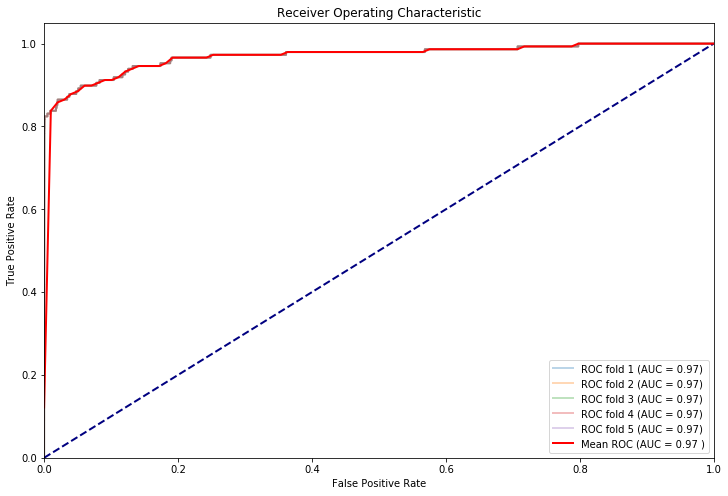

In [65]:
# Building Roc curve to find out cut-off value
roc_curve_graph(LogisticModel1, df_xtrain, y_train)

### The Logistic Regression model on balanaced data using SMOTE has generated the ROC-AUC of 99.14% with Precision as 7.76%, Recall as 94.20% and F1-Score as 14.29%.

## SMOTE - Random Forest

In [66]:
# define hyper-parameters
params={'max_depth': [5,10],'min_samples_leaf': range(5,30,5),'min_samples_split': range(5,30,5),'max_features': range(4,24,4)
       }
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
scoring = ['accuracy','precision','recall','roc_auc','f1']

# instantiate the model
rf_smote1 = RandomForestClassifier(warm_start=True, random_state=100)

# define pipeline
pipeline = make_pipeline(SMOTE(sampling_strategy='minority', random_state=100), rf_smote1)

# Randomized Grid Search
random_search = RandomizedSearchCV(pipeline, param_distributions=new_params, scoring=scoring, cv=skf, refit = 'roc_auc', verbose=1, n_iter=10, return_train_score=False)

In [67]:
random_search.fit(df_xtrain,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 307.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=Pipeline(steps=[('smote',
                                              SMOTE(random_state=100,
                                                    sampling_strategy='minority')),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=100,
                                                                     warm_start=True))]),
                   param_distributions={'randomforestclassifier__max_depth': [5,
                                                                              10],
                                        'randomforestclassifier__max_features': range(4, 24, 4),
                                        'randomforestclassifier__min_samples_leaf': range(5, 30, 5),
                                        'randomforestclassifier__min_samples_split': range(5, 30,

In [68]:
random_search_result = pd.DataFrame(random_search.cv_results_)
print("Accuracy  is : %.2f%%" % (random_search_result.mean_test_accuracy.max()*100.0))
print("Precision is : %.2f%%" % (random_search_result.mean_test_precision.max()*100.0))
print("Recall    is : %.2f%%" % (random_search_result.mean_test_recall.max()*100.0))
print("ROC-AUC   is : %.2f%%" % (random_search_result.mean_test_roc_auc.max()*100.0))
print("f1_score  is : %.2f%%" % (random_search_result.mean_test_f1.max()*100.0))

Accuracy  is : 99.80%
Precision is : 46.09%
Recall    is : 89.54%
ROC-AUC   is : 98.53%
f1_score  is : 59.28%


In [69]:
random_search.best_params_

{'randomforestclassifier__min_samples_split': 15,
 'randomforestclassifier__min_samples_leaf': 10,
 'randomforestclassifier__max_features': 8,
 'randomforestclassifier__max_depth': 5}

In [70]:
# Using the best parameters for building model
RandomForest = RandomForestClassifier(bootstrap=True,warm_start=True, max_depth=5,max_features=8, min_samples_leaf=20,min_samples_split=10, verbose=1,random_state=100)
scoring = ['accuracy','precision','recall','roc_auc','f1']

# define pipeline
pipeline = make_pipeline(SMOTE(sampling_strategy='minority', random_state=100),RandomForest)

# Cross Validation
scores = cross_validate(pipeline, df_xtrain, y_train, scoring=scoring, cv=skf, verbose=1, return_train_score=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_j

In [71]:
cv_results = pd.DataFrame(scores)
print("Accuracy  is : %.2f%%" % (cv_results.test_accuracy.max()*100.0))
print("Precision is : %.2f%%" % (cv_results.test_precision.max()*100.0))
print("Recall    is : %.2f%%" % (cv_results.test_recall.max()*100.0))
print("ROC-AUC   is : %.2f%%" % (cv_results.test_roc_auc.max()*100.0))
print("f1_score  is : %.2f%%" % (cv_results.test_f1.max()*100.0))

Accuracy  is : 99.57%
Precision is : 27.35%
Recall    is : 92.75%
ROC-AUC   is : 99.64%
f1_score  is : 41.78%


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


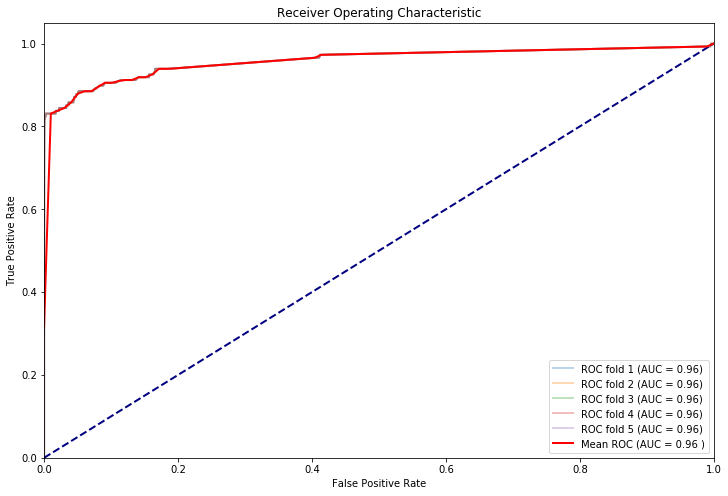

In [72]:
roc_curve_graph(RandomForest, df_xtrain, y_train)

In [73]:
#Check End time

now = datetime.datetime.now()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))


Current date and time : 
2020-11-10 00:58:09


### The Random Forest model using SMOTE has generated the ROC-AUC of 99.64% with Precision as 27.35%, Recall as 92.75% and F1-Score as 41.78%.

# Observations:
1. <b> The fraudulant transactions went as low as 484 among 284807 values. </b>
2. <b>The Data was highly imbalanced and mere measuring overall accuracy would not have helped So the main parameter of for finding best values is ROC_AUC value here. </b>
3. <b> The dataset consists of numerical values from the 28 ‘Principal Component Analysis (PCA)’ transformed features, namely V1 to V28. Furthermore, there is no metadata about the original features provided, so pre-analysis or feature study could not be done. </b> 
4. <b> The ‘Time’ and ‘Amount’ features are not transformed data </b>
5. <b> There is no missing value in the dataset </b>
6. <b> We got the best score when we use the SMOTE (OverSampling) + RandomForest, has generated the ROC_AUC of 99.64%. </b>

# Conclusion:
1. <b> The Random Forest model has generated the ROC_AUC of 99.64% after applying SMOTE and hence is the best model. </b>
2. <b> As per business requirement we can use different parameters to have high values for  Recall or high values for Precision. </b